### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dataset = pd.read_csv('online_retail_II.csv')
df_dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [3]:
# check type data
df_dataset.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [4]:
# mengubah type InvoiceDate ke datetime
df_dataset["InvoiceDate"] = pd.to_datetime(df_dataset['InvoiceDate'])

In [5]:
df_dataset.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [6]:
# menambahkan Year Column dari InvoiceDate
df_dataset['Year'] = pd.DatetimeIndex(df_dataset['InvoiceDate']).year
df_dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Filtering Data

In [7]:
# filtering Quantity minimal 1 dan Invoice tidak mengandung huruf 'C' 
sales = df_dataset[ (df_dataset['Quantity'] >= 1) & (df_dataset['Invoice'] != 'C') ].reset_index()
sales

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...,...
1044416,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1044417,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1044418,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1044419,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [8]:
# membuat kolom baru Revenue
sales['Revenue'] = sales['Quantity'] * sales['Price']
sales

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...,...
1044416,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1044417,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044418,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044419,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [9]:
# rata-rata revenue per tahun
revenue_per_year = sales.groupby('Year')['Revenue'].mean().reset_index()
revenue_per_year

,Year,Revenue
0,2009,18.713273
1,2010,19.909680
2,2011,20.058767


<Axes: xlabel='Year', ylabel='Revenue'>

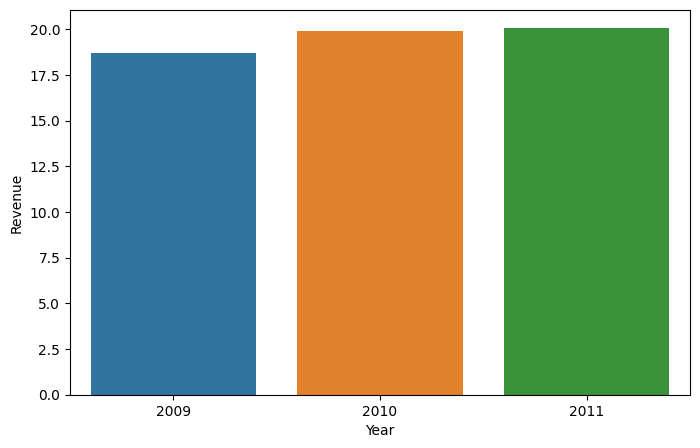

In [10]:
plt.rcParams["figure.figsize"] = (8,5)
sns.barplot(x='Year', y='Revenue', data=revenue_per_year)

### Interpretation

Rata-rata revenue yang diperoleh dari penjualan retail online selama 3 tahun meningkat. Diketahui bahwa pada tahun 2009 rata-rata revenue sebesar 18.713273, kemudian pada tahun 2010 rata-rata revenue yang diperoleh sebesar 19.909680, dan pada tahun 2011 rata-rata revenue yang diperoleh dari penjualan retail online sebesar 20.058767. 

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [11]:
# filtering sales data CustomerID tidak kosong atau notnull
finished = sales[sales['Customer ID'].notnull()].reset_index()
finished

,level_0,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...
805615,1044416,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
805616,1044417,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
805617,1044418,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
805618,1044419,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

In [12]:
# filtering data Invoice yang mengandung huruf 'C'
canceled = df_dataset[df_dataset['Invoice'].str.contains('C')]
canceled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [13]:
# Menghitung jumlah transaksi yang berhasil setiap tahun
finished_each_year = finished.groupby('Year').count().reset_index()
finished_each_year.columns = finished_each_year.columns.str.replace('Invoice', 'Finished Transaction')
finished_each_year

,Year,level_0,index,Finished Transaction,StockCode,Description,Quantity,Finished TransactionDate,Price,Customer ID,Country,Revenue
0,2009,30761,30761,30761,30761,30761,30761,30761,30761,30761,30761,30761
1,2010,403094,403094,403094,403094,403094,403094,403094,403094,403094,403094,403094
2,2011,371765,371765,371765,371765,371765,371765,371765,371765,371765,371765,371765


<Axes: xlabel='Year', ylabel='Finished Transaction'>

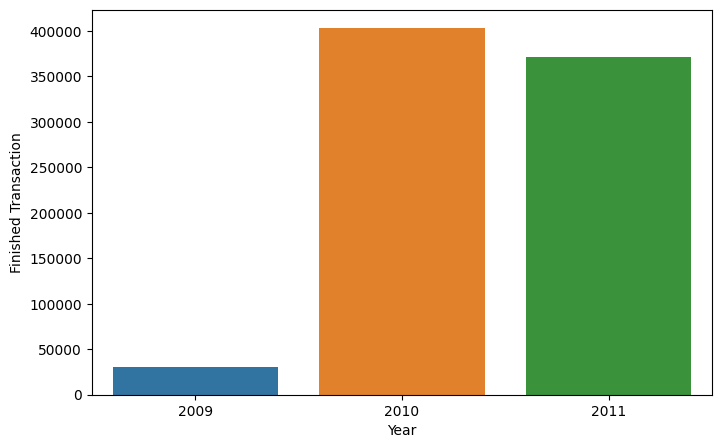

In [14]:
plt.rcParams["figure.figsize"] = (8,5)
sns.barplot(data=finished_each_year, x='Year', y='Finished Transaction')

In [15]:
# menghitung jumlah transaksi yang dibatalkan setiap tahun
canceled_each_year = canceled.groupby('Year').count().reset_index()
canceled_each_year.columns = canceled_each_year.columns.str.replace('Invoice', 'Finished Transaction')
canceled_each_year

,Year,Finished Transaction,StockCode,Description,Quantity,Finished TransactionDate,Price,Customer ID,Country
0,2009,1015,1015,1015,1015,1015,1015,999,1015
1,2010,9919,9919,9919,9919,9919,9919,9530,9919
2,2011,8560,8560,8560,8560,8560,8560,8215,8560


<Axes: xlabel='Year', ylabel='Finished Transaction'>

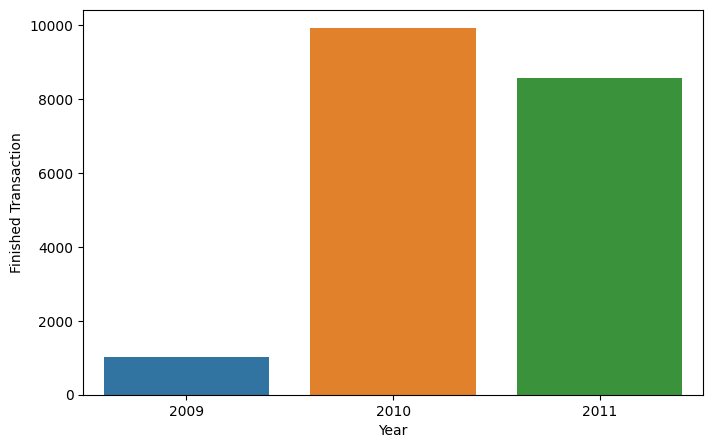

In [16]:
plt.rcParams["figure.figsize"] = (8,5)
sns.barplot(data=canceled_each_year, x='Year', y='Finished Transaction')

### Cancellation Rate

In [17]:
# menghitung jumlah pelanggan yang membatalkan per tahun
cancelID = canceled.groupby('Year').count()
cancelID_2009 = cancelID['Invoice'].iloc[0]
cancelID_2010 = cancelID['Invoice'].iloc[1]
cancelID_2011 = cancelID['Invoice'].iloc[2]
cancelID

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Year,,,,,,,,
2009,1015,1015,1015,1015,1015,1015,999,1015
2010,9919,9919,9919,9919,9919,9919,9530,9919
2011,8560,8560,8560,8560,8560,8560,8215,8560


In [18]:
# menghitung seluruh pelanggan per tahun
allID = df_dataset.groupby('Year').count()
allID_2009 = allID['Invoice'].iloc[0]
allID_2010 = allID['Invoice'].iloc[1]
allID_2011 = allID['Invoice'].iloc[2]
allID

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Year,,,,,,,,
2009,45228,45228,45000,45228,45228,45228,31760,45228
2010,522714,522714,519889,522714,522714,522714,412624,522714
2011,499429,499429,498100,499429,499429,499429,379980,499429


In [19]:
# menghitung cancellation rate per tahun
cancellation_rate = (cancelID / allID) * 100
cancellation_rate.columns = cancellation_rate.columns.str.replace('Invoice', 'Cancellation Rate')
cancellation_rate = cancellation_rate.reset_index()
cancellation_rate

,Year,Cancellation Rate,StockCode,Description,Quantity,Cancellation RateDate,Price,Customer ID,Country
0,2009,2.244185,2.244185,2.255556,2.244185,2.244185,2.244185,3.145466,2.244185
1,2010,1.897596,1.897596,1.907907,1.897596,1.897596,1.897596,2.309609,1.897596
2,2011,1.713957,1.713957,1.718530,1.713957,1.713957,1.713957,2.161956,1.713957


<Axes: xlabel='Year', ylabel='Cancellation Rate'>

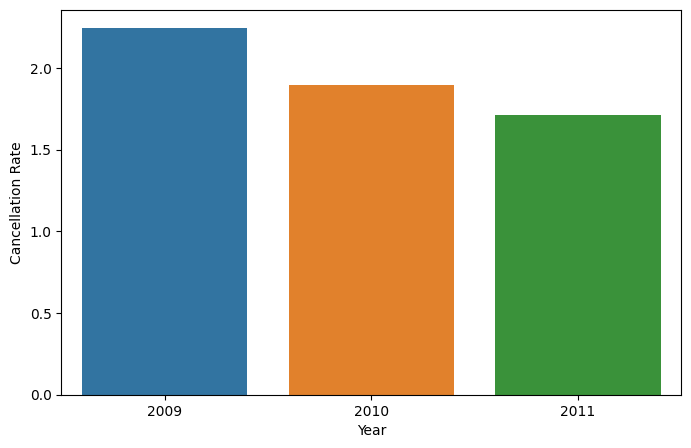

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)
sns.barplot(data=cancellation_rate, x='Year', y='Cancellation Rate')

### Interpretation

<Axes: xlabel='Year', ylabel='Finished Transaction'>

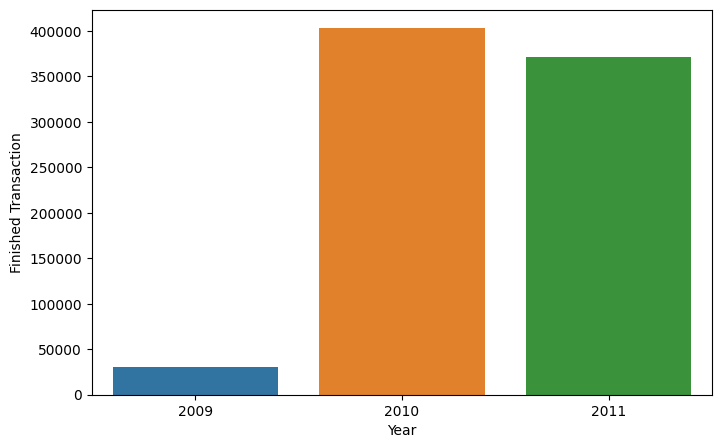

In [21]:
# perbandingan output
sns.barplot(data=finished_each_year, x='Year', y='Finished Transaction')

<Axes: xlabel='Year', ylabel='Finished Transaction'>

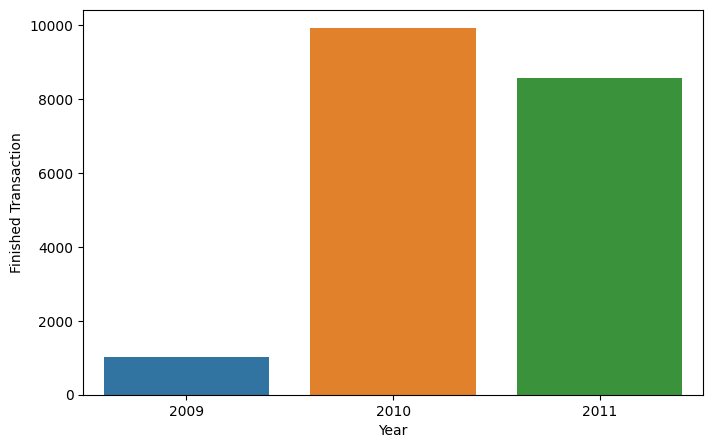

In [22]:
sns.barplot(data=canceled_each_year, x='Year', y='Finished Transaction')

<Axes: xlabel='Year', ylabel='Cancellation Rate'>

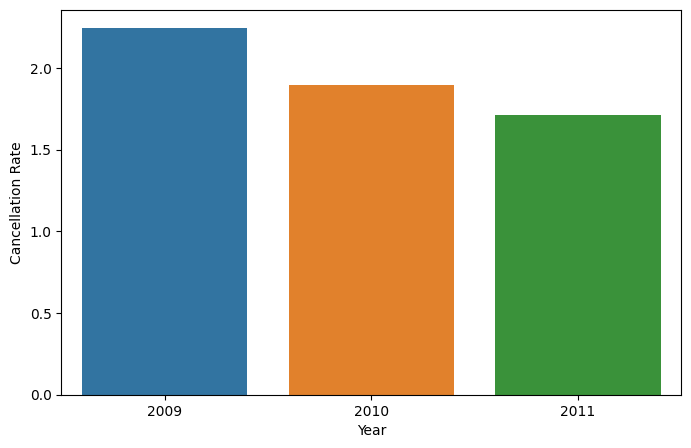

In [23]:
sns.barplot(data=cancellation_rate, x='Year', y='Cancellation Rate')

Pada tahun 2009 Finished & Canceled Transaction merupakan yang terendah dibandingkan tahun 2010 dan 2011. Cancellation rate di tahun 2019 merupakan yang tertinggi dibandingkan tahun 2010 dan 2011. Tahun 2009 Finished transaction online retail sebesar 30761 dengan jumlah Canceled transaction sebesar 1015. Dengan cancellation rate sebesar 2.244185% dapat diketahui bahwa pada tahun 2009 lebih banyak pelanggan yang membatalkan transaksi dibandingkan tahun 2010 dan 2011.

Finished & Canceled Transaction online retial tertinggi terjadi di tahun 2010. Jumlah finished transaction sebesar 403094 dan canceled transaction sebesar 9919. Pada tahun 2010, cancellation rate berada di tingkat kedua dengan rate 1.897596%. Hal ini menunjukan bahwa cancellation rate menurun per tahun.

Tahun 2011, Finished & Canceled Transaction online retail mengalami penurunan. Finished Transaction menurun sebesar 31329 sehingga jumlah Finished Transaction tahun 2010 sebesar 371765. Untuk Canceled Transaction menurun sebesar 1359 dari tahun 2010 sehingga jumlah transaksi yang dibatalkan menjadi 8560. Cancellation rate tahun 2011 merupakan yang terendah dibanding 2009 dan 2010 yaitu sebesar 1.713957%. Rendahnya cancellation rate ini menunjukan bahwa pelanggan yang membatalkan transaksi menurun selama 3 tahun tersebut.

Performa online retail selama 3 tahun tersebut mengalami kenaikan dan penurunan. Finished Transaction yang di tahun 2009 cukup rendah, di tahun 2010 mampu meningkat dengan signifikan, meskipun di tahun 2011 mengalami penurunan. Namun, penurunan tersebut masih bisa dikatakan rendah. Hal tersebut tidak berbeda dengan Canceled Transaction yang mengalami kenaikan dan penurunan. Di tahun 2010 Canceled Transaction meningkat cukup tinggi dan di tahun 2011 mengalami penurunan yang cukup rendah. Penurunan Canceled Transaction ini baik untuk performa online retail. Namun, retail perlu meriset penyebab pelanggan membatalkan transaksinya, agar performa online retail semakin baik dan Canceled Transaction dapat menurun setiap tahunnya. Cancellation rate selama 3 tahun mengalami penurunan. Hal ini menunjukkan bahwa semakin rendah pelanggan yang membatalkan transaksi dan ini akan berdampak baik pada retail. Retail tentunya harus meriset penyebab pelanggan membatalkan transaksi dan meriset kembali mengenai produk atau marketing agar pelanggan kembali meningkat dan sedikit yang membatalkan transaksi.